<a href="https://colab.research.google.com/github/seys-fing/scripts/blob/master/seys_08_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplos del ejecto de la fase en la transformada de Fourier

In [0]:
import numpy as np
import skimage
from skimage import data
from matplotlib import pyplot as plt
from google.colab import files
from skimage.color import rgb2gray
from PIL import Image
import PIL.ImageOps    

import librosa
import librosa.display
import IPython.display as ipd


#im = Image.open(uploaded)



In [0]:


uploaded = files.upload()


Saving HCTSun.mp3 to HCTSun.mp3


In [0]:
audiof=ipd.Audio('HCTSun.mp3') # load a local WAV file
x, sr = librosa.load('HCTSun.mp3')

print(x.shape)
print(sr)



(4714896,)
22050


In [0]:
xs=x[0:1000]
ipd.Audio(xs, rate=sr) # load a NumPy array



SyntaxError: ignored

In [0]:
w=np.linspace(0,1000,1000)
fx=np.fft.fft(xs)
fxs=np.fft.fftshift(fx)
plt.subplot(2,1,1)
plt.plot(w ,10*np.log10(np.abs(fxs)))
ys=np.convolve(xs,[1/4, 1/2, 1/4])
fy=np.fft.fft(ys)
fys=np.fft.fftshift(fy)

plt.subplot(2,1,2)
plt.plot(w ,10*np.log10(np.abs(fys)))
ipd.Audio(ys, rate=sr) # load a NumPy array


Aquí termina el primer ejemplo

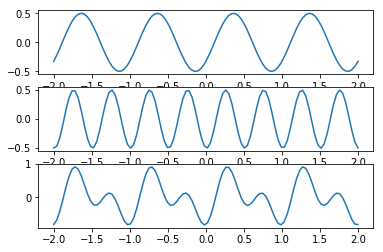

In [0]:
phi1=4
phi2=3
t = np.linspace(-2, 2, 100)
x1=0.5*np.cos(2*np.pi*t+phi1)
x2=0.5*np.cos(4*np.pi*t+phi2)
plt.subplot(3,1,1)
plt.plot(t,x1)
plt.subplot(3,1,2)
plt.plot(t,x2)
plt.subplot(3,1,3)
plt.plot(t,x1+x2)


Visto en imágenes

In [0]:
uploaded = files.upload()

Saving foto_fing.jpg to foto_fing.jpg


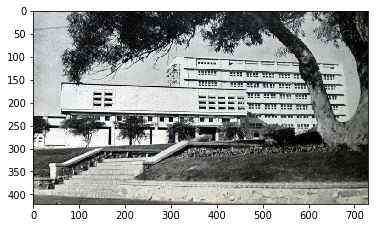

In [0]:
import matplotlib.pyplot as plt
im = Image.open("foto_fing.jpg")
#im.show()
plt.imshow(im)

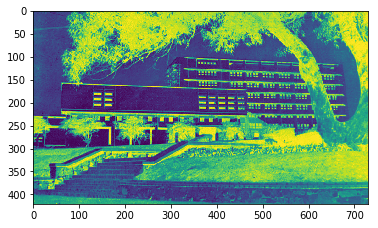

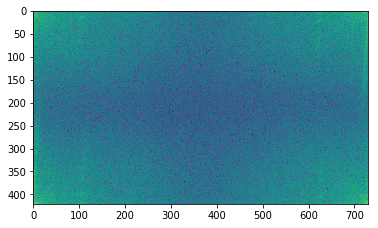

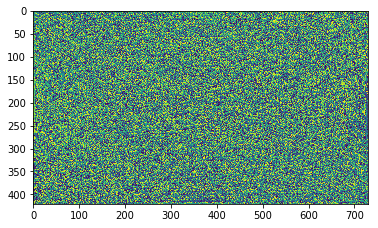

In [0]:
imbw= im.convert('L') # convert image to monochrome - this works
#imbw= rgb2gray(im) # convert image to monochrome - this works
#imfft = np.fft.fft2(imbw, s=None, axes=(-2, -1), norm=None)
imbwi=PIL.ImageOps.invert(imbw)
imfft = np.fft.fft2(imbwi, s=None, norm=None)
plt.imshow(imbwi)
plt.show()
plt.imshow(np.log10(np.abs(imfft)))
plt.show()
plt.imshow(np.angle(imfft))
plt.show()
           
           

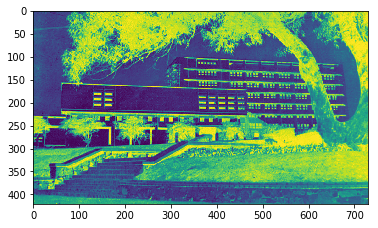

In [0]:
imr=np.fft.ifft2(imfft)
plt.imshow(np.abs(imr))
plt.show()

In [0]:
whos

Variable   Type        Data/Info
--------------------------------
Image      module      <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
PIL        module      <module 'PIL' from '/usr/<...>ackages/PIL/__init__.py'>
audiof     Audio       <IPython.lib.display.Audio object>
data       module      <module 'skimage.data' fr<...>kimage/data/__init__.py'>
files      module      <module 'google.colab.fil<...>s/google/colab/files.py'>
fx         ndarray     10000: 10000 elems, type `complex128`, 160000 bytes (156.25 kb)
ipd        module      <module 'IPython.display'<...>ages/IPython/display.py'>
librosa    module      <module 'librosa' from '/<...>ges/librosa/__init__.py'>
np         module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
rgb2gray   function    <function rgb2gray at 0x7f43cba6a268>
skimage    module      <module 'skimage' from '/<...>ges/skimage/__init__.py'>
sr         int   

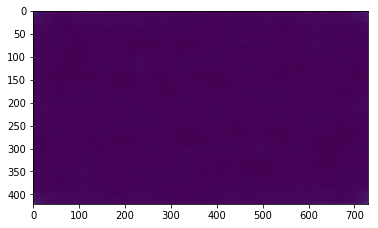

In [0]:
#imfftf=imfft*np.exp(1j*(2*np.random.rand(421,730)-1)*np.pi/2)
imfftf=np.abs(imfft)
imrf=np.fft.ifft2(imfftf)
plt.imshow(np.abs(imrf))
plt.show()

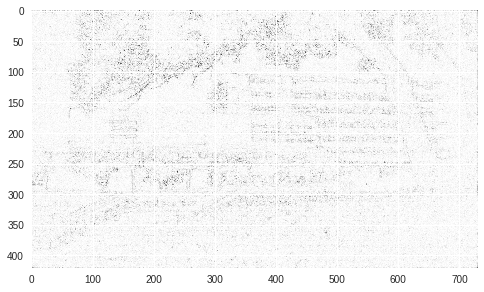

In [0]:
imffta=imfft/np.abs(imfft)
imra=np.fft.ifft2(imffta)
plt.imshow(np.abs(imra))
plt.show()

Step response de un sistema de segundo orden

In [0]:


def step_damper(t,z):
  if(z<1):
    p1=-z+np.sqrt(1-z*z)*1j
    p2=-z-np.sqrt(1-z*z)*1j
    A=(1+2*z*p1)/(2*np.sqrt(1-z*z)*1j)
    B=-(1+2*z*p2)/(2*np.sqrt(1-z*z)*1j)
    s=A*(-1+np.exp(p1*t))/p1+B*(-1+np.exp(p2*t))/p2
    return s   
  if(z>1):
    print(z)
    p1=-z+np.sqrt(z*z-1)
    p2=-z-np.sqrt(z*z-1)
    print(p1)
    print(p2)
    A=(1+2*z*p1)/(p1-p2)
    B=(1+2*z*p2)/(p2-p1)
    print(A)
    print(B)
    #s=A*(np.exp(p1*t)-1)/p1+B*(np.exp(p2*t)-1)/p2
    s=A*np.exp(p1*t)+B*(np.exp(p2*t))
    
    #t = np.linspace(0, 10, 100)
    #plt.subplot(2,1,1)
    #plt.plot(t,A*(-1+np.exp(p1*t))/p1)
    #plt.subplot(2,1,2)
    #plt.plot(t,B*(-1+np.exp(p2*t))/p2)
    
    return s 

In [0]:
t = np.linspace(0, 10, 100)
s=step_damper(t,3)

3
-0.1715728752538097
-5.82842712474619
-0.005203820042826774
6.005203820042826


5
-0.10102051443364424
-9.898979485566356
-0.0010415581823223932
10.001041558182322


Text(0, 0.5, 's(t)')

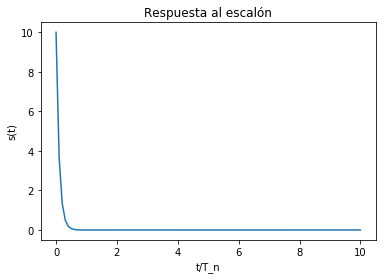

In [0]:
t = np.linspace(0, 10, 100)
s=step_damper(t,5)
plt.plot(t,s)
plt.title("Respuesta al escalón")
plt.xlabel("t/T_n")
plt.ylabel("s(t)")


Text(0, 0.5, 'H($\\omega$)')

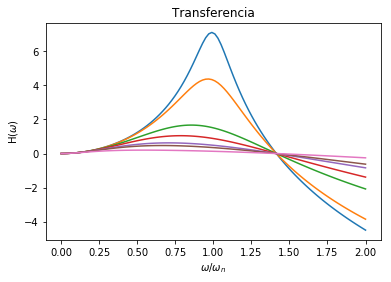

In [0]:
def transf_damper(w,z):
  return (1+2*z*1j*w)/(1+2*z*1j*w-w*w)

w = np.linspace(0.001, 2, 100)
H=transf_damper(w,.1)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_damper(w,.2)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_damper(w,.5)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_damper(w,1/np.sqrt(2))
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_damper(w,1)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_damper(w,1.2)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_damper(w,2)
plt.plot(w,10*np.log10(np.abs(H)))
plt.title("Transferencia")
plt.xlabel("$\omega/\omega_n$")
plt.ylabel("H($\omega$)")


In [0]:


def step_second_order(t,z):
  if(z<1):
    p1=-z+np.sqrt(1-z*z)*1j
    p2=-z-np.sqrt(1-z*z)*1j
    A=(1)/(2*np.sqrt(1-z*z)*1j)
    B=-(1)/(2*np.sqrt(1-z*z)*1j)
    s=A*(-1+np.exp(p1*t))/p1+B*(-1+np.exp(p2*t))/p2
    return s   
  if(z>1):
    print(z)
    p1=-z+np.sqrt(z*z-1)
    p2=-z-np.sqrt(z*z-1)
    A=(1)/(2*np.sqrt(z*z-1))
    B=-(1)/(2*np.sqrt(z*z-1))
    s=A*(-1+np.exp(p1*t))/p1+B*(-1+np.exp(p2*t))/p2
    t = np.linspace(0, 10, 100)
    print(p1)
    print(p2)
    print(A)
    print(B)
    plt.subplot(2,1,1)
    plt.plot(t,A*(-1+np.exp(p1*t))/p1)
    plt.subplot(2,1,2)
    plt.plot(t,B*(-1+np.exp(p2*t))/p2)
    
    return s 

200
-0.002500015625201968
-399.9974999843748
0.0025000312505859498
-0.0025000312505859498


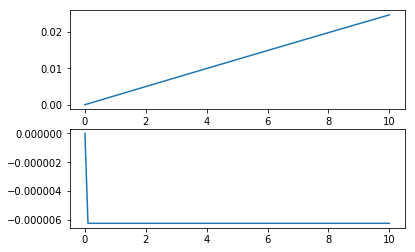

In [0]:
t = np.linspace(0, 10, 100)
s=step_second_order(t,200)


1.2
1.5
2
5


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 's(t)')

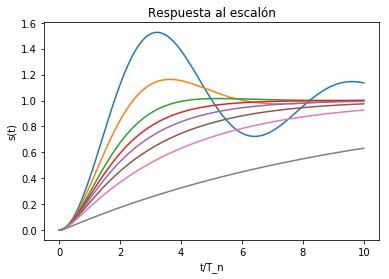

In [0]:
t = np.linspace(0, 10, 100)
s=step_second_order(t,.2)
plt.plot(t,s)
s=step_second_order(t,.5)
plt.plot(t,s)
s=step_second_order(t,.8)
plt.plot(t,s)
s=step_second_order(t,.999)
plt.plot(t,s)
s=step_second_order(t,1.2)
plt.plot(t,s)
s=step_second_order(t,1.5)
plt.plot(t,s)
s=step_second_order(t,2)
plt.plot(t,s)
s=step_second_order(t,5)
plt.plot(t,s)
plt.title("Respuesta al escalón")
plt.xlabel("t/T_n")
plt.ylabel("s(t)")


Text(0, 0.5, 'H($\\omega$)')

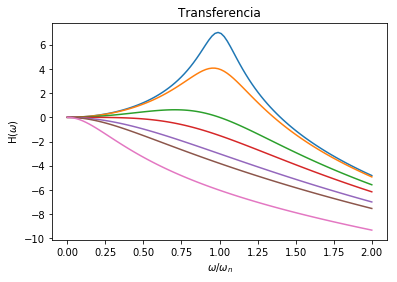

In [0]:
def transf_second_order(w,z):
  return (1)/(1+2*z*1j*w-w*w)

w = np.linspace(0.001, 2, 100)
H=transf_second_order(w,.1)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_second_order(w,.2)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_second_order(w,.5)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_second_order(w,1/np.sqrt(2))
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_second_order(w,1)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_second_order(w,1.2)
plt.plot(w,10*np.log10(np.abs(H)))
H=transf_second_order(w,2)
plt.plot(w,10*np.log10(np.abs(H)))
plt.title("Transferencia")
plt.xlabel("$\omega/\omega_n$")
plt.ylabel("H($\omega$)")


[1. 2. 3. 4. 5.]
[1.         0.07179677 0.02943725 0.01613323 0.01020514]


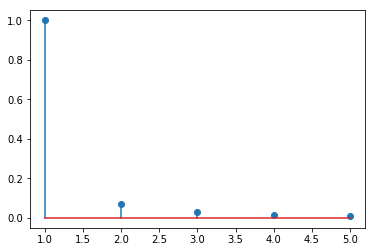

In [0]:
z = np.linspace(1, 5, 5)
r= (2*z*z-2*z*np.sqrt(z*z-1))-1
plt.stem(z,r)
print(z)
print(r)

In [0]:
xs=x[0:10000]
ipd.Audio(xs, rate=sr) # load a NumPy array

w=np.linspace(0,10000,10000)
fx=np.fft.fft(xs)
fxs=np.fft.fftshift(fx)
plt.subplot(2,1,1)
plt.plot(w ,10*np.log10(np.abs(fxs)))

NameError: ignored